In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [19]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

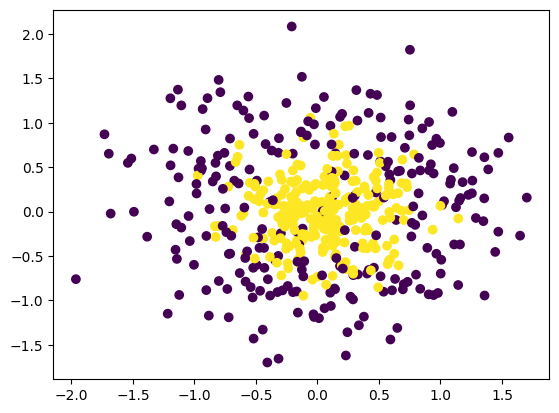

In [20]:
plt.scatter(X[:,0],X[:,1],c=y)

### Adaboost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [22]:
abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

np.float64(0.812)

In [23]:
abc.fit(X,y)

AdaBoostClassifier()

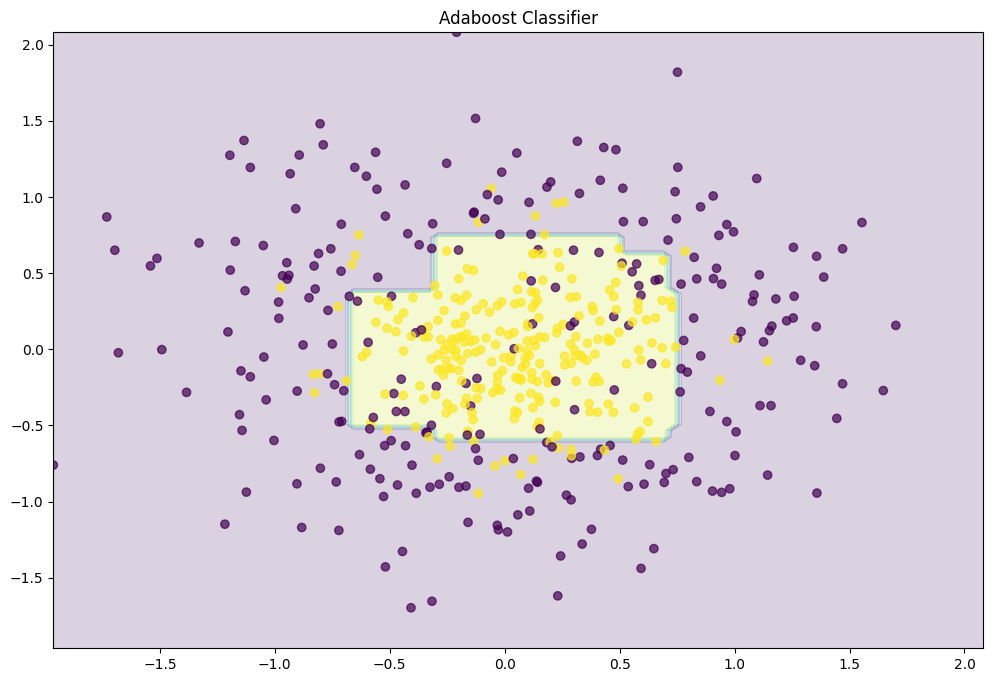

In [24]:
def plot_decision_boundary(clf):
  plt.figure(figsize=(12, 8))
  x_range = np.linspace(X.min(), X.max(), 100)
  xx1, xx2 = np.meshgrid(x_range, x_range)
  y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
  y_hat = y_hat.reshape(xx1.shape)

  plt.contourf(xx1, xx2, y_hat, alpha=0.2)
  plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
  plt.title("Adaboost Classifier")
  plt.show()

plot_decision_boundary(abc)

With diff hyperparameters, n_estimators=1500 and learning_rate=0.1

In [25]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1500)

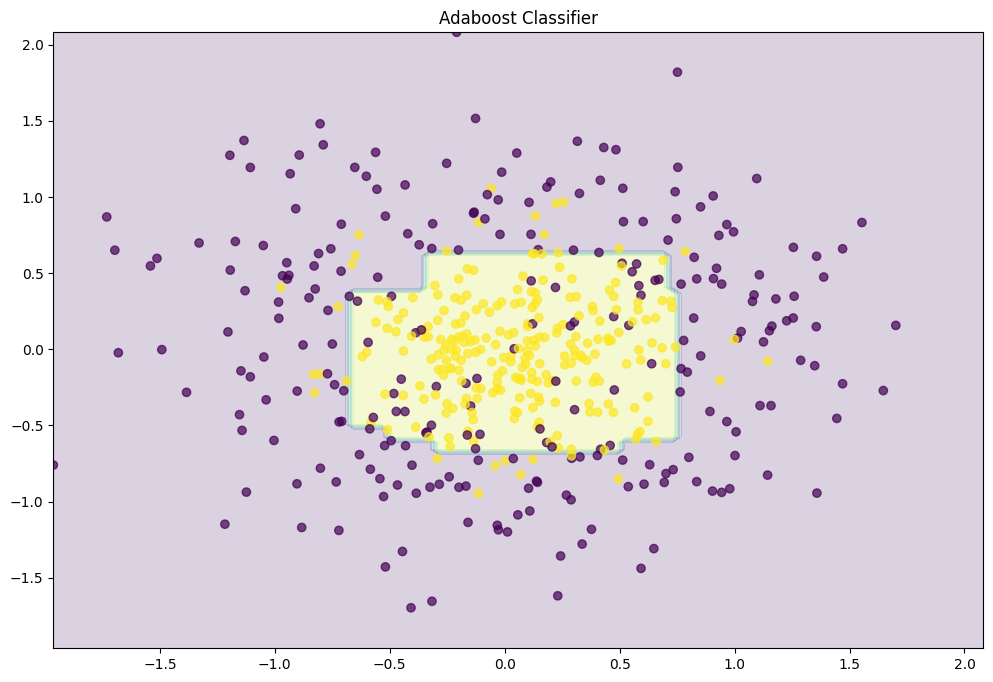

In [26]:
plot_decision_boundary(abc)

Hyperparameter Tuning using GridSearch

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid = {
    'n_estimators' : [10, 50, 100, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid

{'n_estimators': [10, 50, 100, 500],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'algorithm': ['SAMME', 'SAMME.R']}

In [29]:
abc_grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
abc_grid.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [30]:
abc_grid.best_score_

np.float64(0.8320000000000001)

In [31]:
abc_grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}

In [32]:
print("Best: %f using %s" % (abc_grid.best_score_, abc_grid.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


In [34]:
# Link : https://stats.stackexchange.com/questions/82323/shrinkage-parameter-in-adaboost